In [ ]:
#import the required libraries
import pathlib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_path = '/content/drive/My Drive/CNN_assignment/Skin'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [ ]:
# Count the number of image in Train and Test directory
# Using the glob to retrieve files/pathnames matching a specified pattern.

#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Found 11239 files belonging to 9 classes.


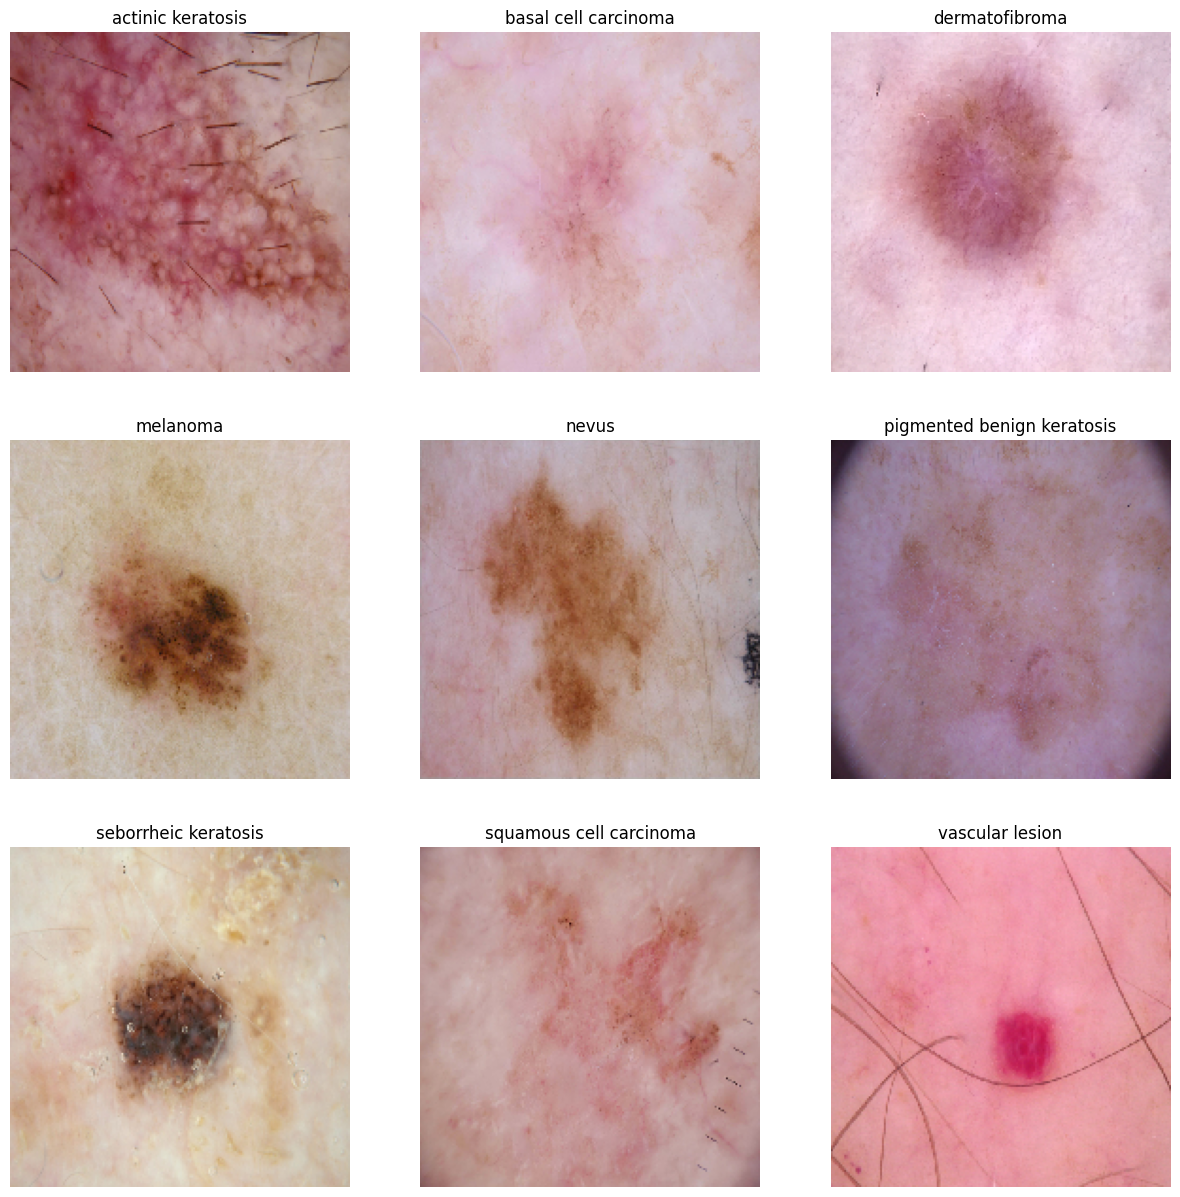

In [ ]:
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")


In [ ]:
import os
import pathlib
import pandas as pd

def class_distribution_count(directory):
    # Count number of images in each class
    count = []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                              if os.path.isfile(os.path.join(path, name))]))

    # Name of the classes
    sub_directory = [name for name in os.listdir(directory)
                     if os.path.isdir(os.path.join(directory, name))]

    # Return DataFrame with image count and class
    return pd.DataFrame(list(zip(sub_directory, count)), columns=['Class', 'No. of Image'])

# Example usage
data_dir_train = '/content/drive/My Drive/CNN_assignment/Skin/Train'
df = class_distribution_count(data_dir_train)
print(df)


                        Class  No. of Image
0        seborrheic keratosis            77
1     squamous cell carcinoma           181
2  pigmented benign keratosis           462
3             vascular lesion           139
4              dermatofibroma            95
5        basal cell carcinoma           376
6                    melanoma           438
7           actinic keratosis           114
8                       nevus           357


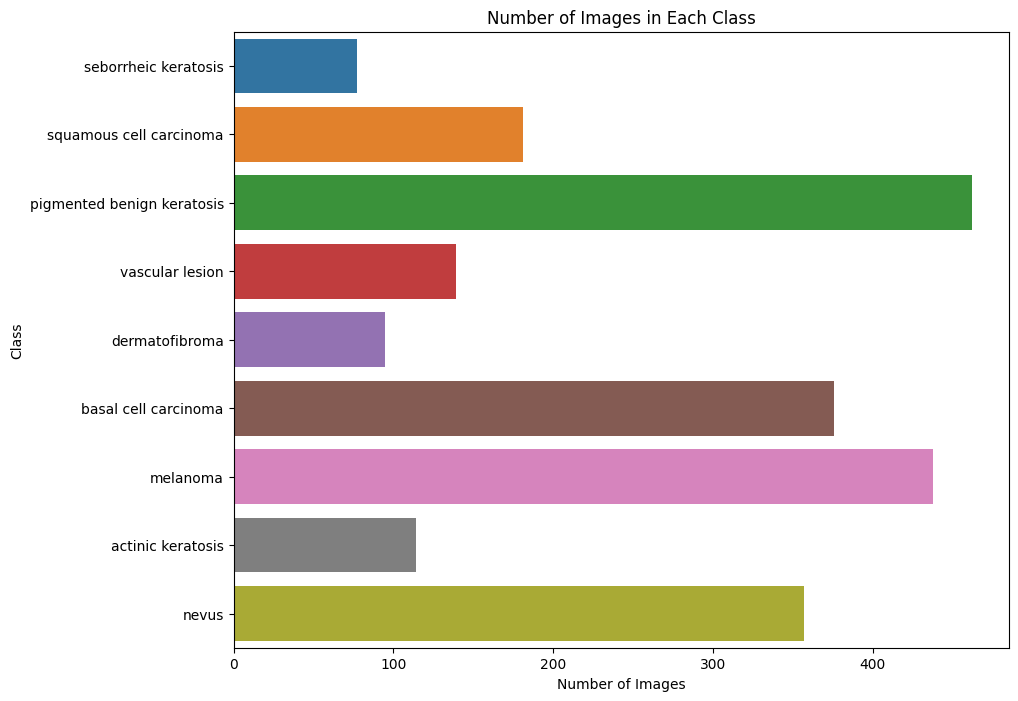

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the class_distribution_count function defined and df created
# class_distribution_count definition goes here...

# Visualize the Number of images in each class
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df, label="Class")
plt.title("Number of Images in Each Class")
plt.xlabel("Number of Images")
plt.ylabel("Class")
plt.show()


In [ ]:
##Creating the dataset
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import tensorflow as tf



# Create the training dataset using tf.keras.preprocessing.image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
##creating validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


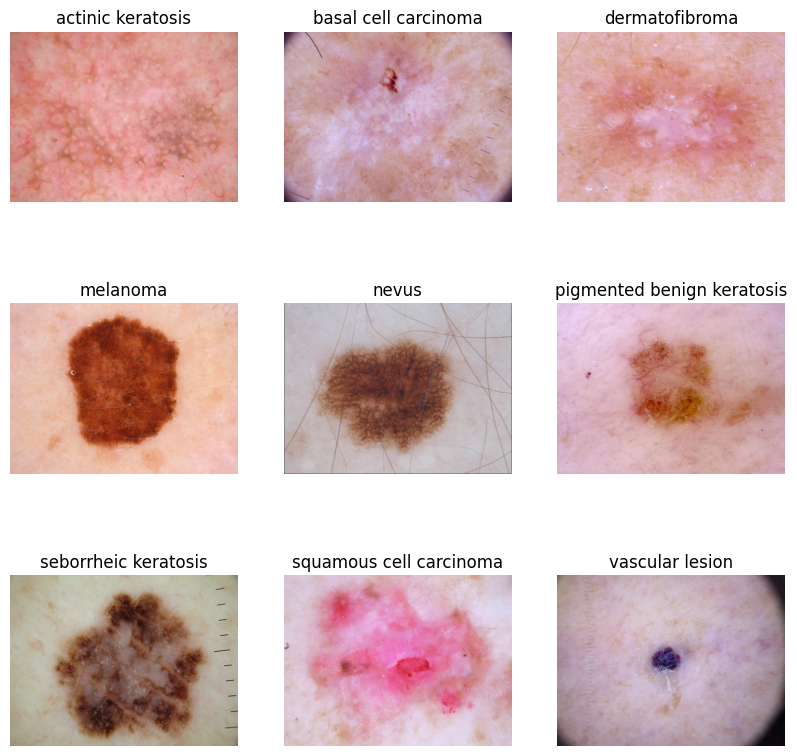

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path

# Assuming class_names is a list containing the class names
class_names = sorted(train_ds.class_names)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    # Assuming data_dir_train is a Path object
    image_path = str(list(Path(data_dir_train).glob(f'{class_names[i]}/*.jpg'))[1])
    image = plt.imread(image_path)
    plt.title(class_names[i])
    plt.imshow(image)
    plt.axis('off')

plt.show()


In [ ]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE  # Use tf.data.AUTOTUNE for TensorFlow versions 2.3 and later

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Rescaling

# Assuming you have defined img_height and img_width earlier

model = Sequential()

# Rescale the input image pixels to values between 0 and 1
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Convolutional layer with 32 filters, kernel size (3,3), and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), padding='Same', activation='relu'))

# MaxPooling layer with pool size (2,2)
model.add(MaxPool2D(pool_size=(2, 2)))

# Dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Additional Conv2D, MaxPool2D, and Dropout layers are repeated in a similar fashion
model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(7, 7), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(11, 11), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



# Flatten layer to convert the 3D output to 1D
model.add(Flatten())

# Dense (fully connected) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 9 units and softmax activation for multi-class classification
model.add(Dense(9, activation='softmax'))



In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1, factor=0.2, min_lr=1e-7)

opt = Adam(learning_rate=0.001)  # You can adjust the learning rate as needed

# If your labels are integers (class indices), use SparseCategoricalCrossentropy
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                

In [ ]:
epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[learn_control],
    steps_per_epoch=len(train_ds),
    validation_steps=len(val_ds)
)


Epoch 1/20
169/169 [==============================] - 379s 2s/step - loss: 2.1848 - accuracy: 0.1335 - val_loss: 2.1854 - val_accuracy: 0.1403 - lr: 0.0010
Epoch 2/20
169/169 [==============================] - 225s 1s/step - loss: 2.1569 - accuracy: 0.1580 - val_loss: 1.9308 - val_accuracy: 0.2205 - lr: 0.0010
Epoch 3/20
169/169 [==============================] - 225s 1s/step - loss: 1.8119 - accuracy: 0.2795 - val_loss: 1.7013 - val_accuracy: 0.3356 - lr: 0.0010
Epoch 4/20
169/169 [==============================] - 232s 1s/step - loss: 1.6491 - accuracy: 0.3537 - val_loss: 1.6637 - val_accuracy: 0.3749 - lr: 0.0010
Epoch 5/20
169/169 [==============================] - 231s 1s/step - loss: 1.5694 - accuracy: 0.3872 - val_loss: 1.5903 - val_accuracy: 0.3890 - lr: 0.0010
Epoch 6/20
169/169 [==============================] - 234s 1s/step - loss: 1.5142 - accuracy: 0.4065 - val_loss: 1.4558 - val_accuracy: 0.4365 - lr: 0.0010
Epoch 7/20
169/169 [==============================] - 231s 1s/st

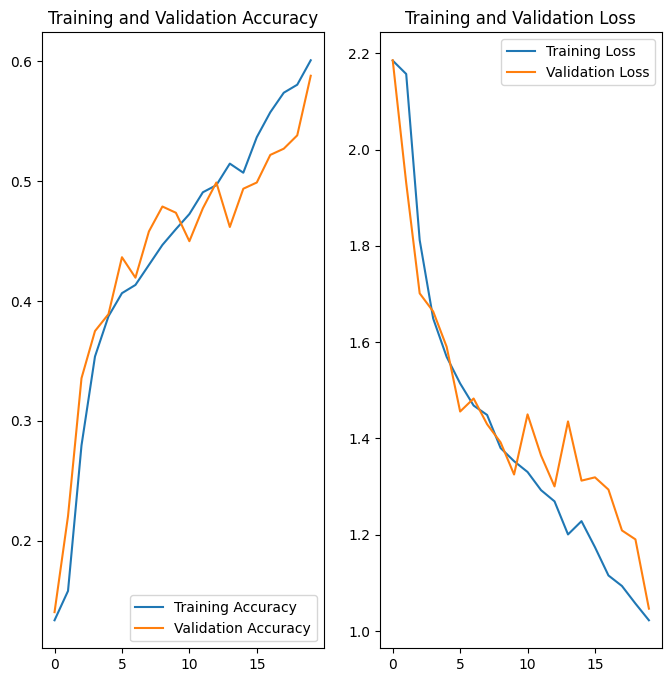

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Training and Validation Accuracy:
 While the training and validation accuracies align closely, indicating a well-fitted model, it's notable that the overall accuracy remains relatively low.
 The model requires more epochs to train with class imbalance handled.
Revised: To enhance the model's performance, it is advisable to extend the training duration, particularly with attention to addressing class imbalance.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# augumentation strategy with flip,rotate,skew,shift, zoom, brightness, contrast, saturation, hue
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.1)
  ]
)

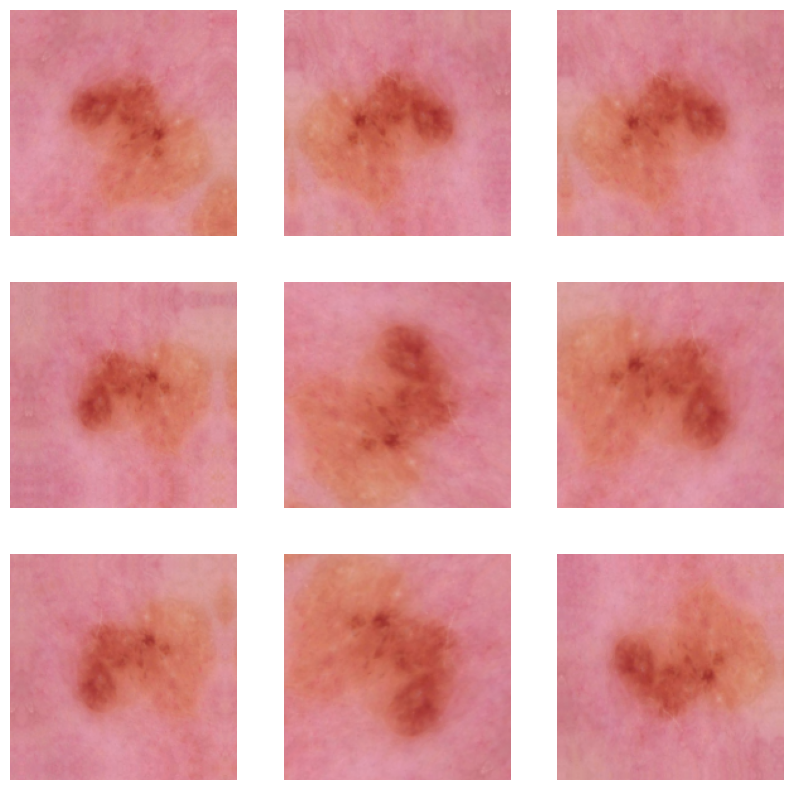

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Rescaling

# Assuming you have defined img_height and img_width earlier

model = Sequential()

# Rescale the input image pixels to values between 0 and 1
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Convolutional layer with 32 filters, kernel size (3,3), and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), padding='Same', activation='relu'))

# MaxPooling layer with pool size (2,2)
model.add(MaxPool2D(pool_size=(2, 2)))

# Dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Additional Conv2D, MaxPool2D, and Dropout layers are repeated in a similar fashion
model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(7, 7), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(11, 11), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



# Flatten layer to convert the 3D output to 1D
model.add(Flatten())

# Dense (fully connected) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 9 units and softmax activation for multi-class classification
model.add(Dense(9, activation='softmax'))


In [ ]:
### Todo, choose an appropirate optimiser and loss function
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/20
169/169 [==============================] - 234s 1s/step - loss: 2.1144 - accuracy: 0.1630 - val_loss: 1.9737 - val_accuracy: 0.2428 - lr: 0.0010
Epoch 2/20
169/169 [==============================] - 233s 1s/step - loss: 1.7931 - accuracy: 0.2919 - val_loss: 1.8745 - val_accuracy: 0.2962 - lr: 0.0010
Epoch 3/20
169/169 [==============================] - 229s 1s/step - loss: 1.5968 - accuracy: 0.3756 - val_loss: 1.5123 - val_accuracy: 0.3957 - lr: 0.0010
Epoch 4/20
169/169 [==============================] - 229s 1s/step - loss: 1.4999 - accuracy: 0.4043 - val_loss: 1.5138 - val_accuracy: 0.4113 - lr: 0.0010
Epoch 5/20
169/169 [==============================] - 231s 1s/step - loss: 1.4735 - accuracy: 0.4191 - val_loss: 1.6267 - val_accuracy: 0.3675 - lr: 0.0010
Epoch 6/20
169/169 [==============================] - 230s 1s/step - loss: 1.4288 - accuracy: 0.4342 - val_loss: 1.5306 - val_accuracy: 0.4217 - lr: 0.0010
Epoch 7/20
169/169 [==============================] - 229s 1s/st

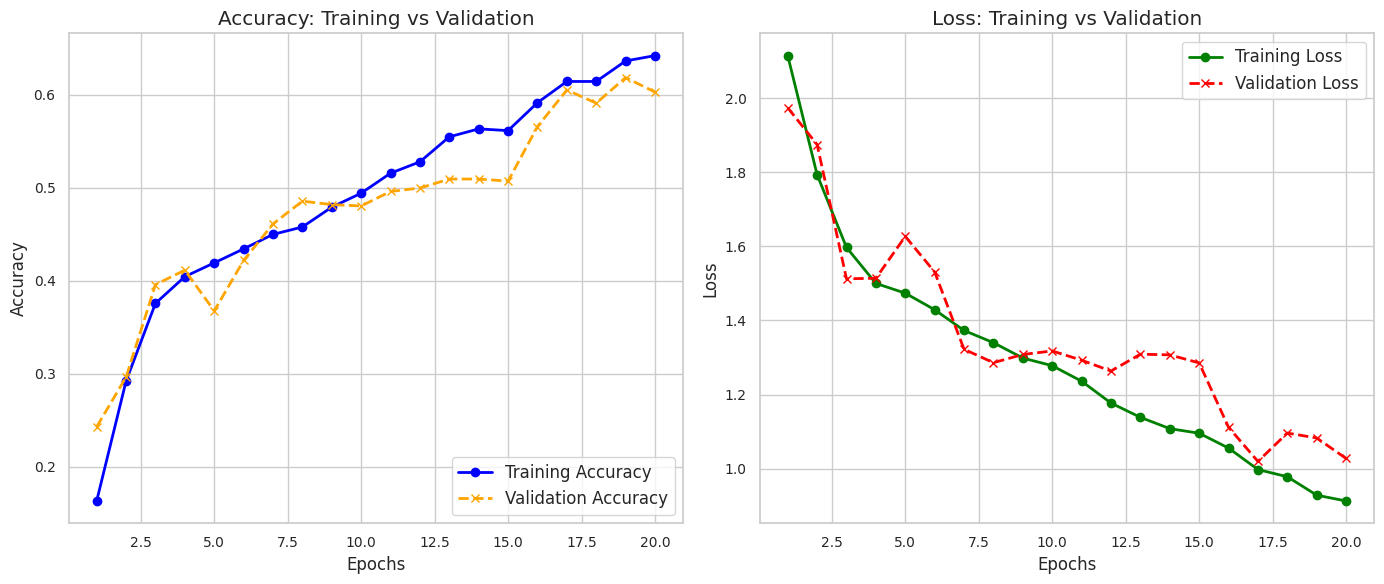

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Extracting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)  # Start epochs from 1 for better visual alignment

# Plotting training and validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange', marker='x', linestyle='--', linewidth=2)
plt.legend(loc='lower right', fontsize='medium')
plt.title('Accuracy: Training vs Validation', fontsize='large')
plt.xlabel('Epochs', fontsize='medium')
plt.ylabel('Accuracy', fontsize='medium')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='green', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red', marker='x', linestyle='--', linewidth=2)
plt.legend(loc='upper right', fontsize='medium')
plt.title('Loss: Training vs Validation', fontsize='large')
plt.xlabel('Epochs', fontsize='medium')
plt.ylabel('Loss', fontsize='medium')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from pathlib import Path

import pandas as pd
from pathlib import Path


# Initialize an empty dictionary to store class names and image counts
class_diff_dict = {'class': [], 'number': []}

# Iterate over class names and count the number of images in each class
for class_name in class_names:
    class_path = data_dir_train / class_name
    image_count = len(list(class_path.glob('*.jpg')))
    class_diff_dict['class'].append(class_name)
    class_diff_dict['number'].append(image_count)

# Create a DataFrame from the dictionary
class_diff = pd.DataFrame(class_diff_dict)

# Display the DataFrame
print(class_diff)


                        class  number
0           actinic keratosis     114
1        basal cell carcinoma     376
2              dermatofibroma      95
3                    melanoma     438
4                       nevus     357
5  pigmented benign keratosis     462
6        seborrheic keratosis      77
7     squamous cell carcinoma     181
8             vascular lesion     139


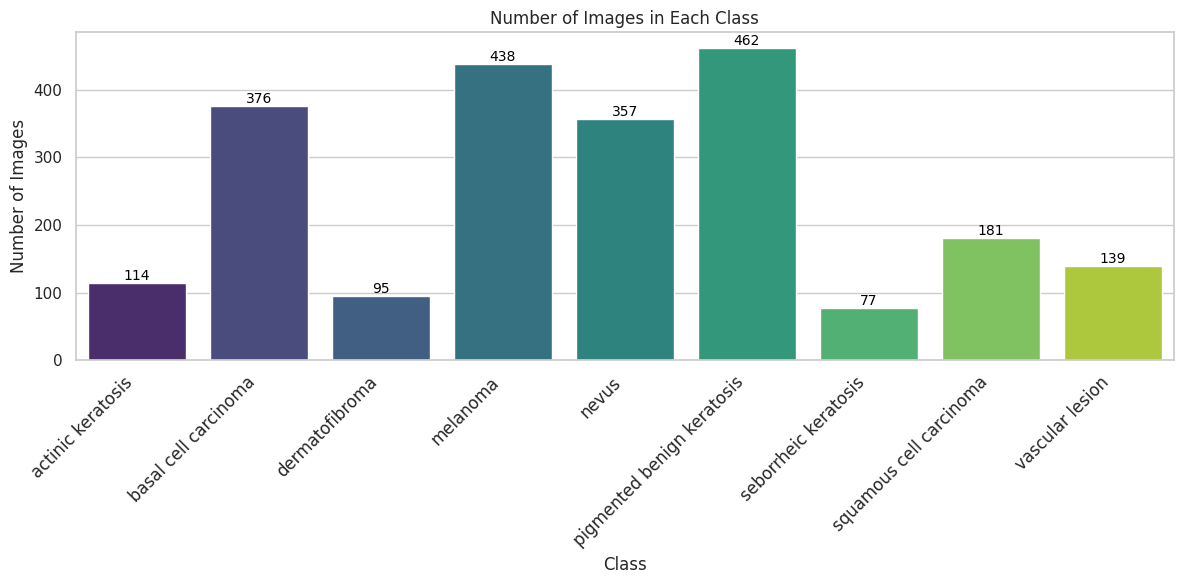

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plotting a bar plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='class', y='number', data=class_diff, palette='viridis')
ax.set(title='Number of Images in Each Class', xlabel='Class', ylabel='Number of Images')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize='medium')

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize='small', color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


##We've identified a class imbalance issue in  dataset, with "seborrheic keratosis" having the least number of samples (77) and "pigmented benign keratosis" dominating with 462 samples. To address this imbalance, we can use data augmentation techniques to generate additional samples for classes with fewer instances.

##As  mentioned, Augmentor is a Python package that can be helpful for augmenting image datasets.

In [ ]:
#install Augmentor
!pip install Augmentor

In [ ]:
!pip install pathlib

In [ ]:
class_names=['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

In [ ]:
import Augmentor
import pathlib
from pathlib import Path


# Define the path to the training dataset
path_to_training_dataset = Path('/content/drive/My Drive/CNN_assignment/Skin/Train/')

# Implement data augmentation for each class
for class_name in class_names:
    class_path = path_to_training_dataset / class_name
    augmentation_pipeline = Augmentor.Pipeline(str(class_path))

    # Introduce augmentation operations
    augmentation_pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Generate 500 augmented samples per class
    augmentation_pipeline.sample(500)

print("Data augmentation process completed.")


Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FECB3D77E20>: 100%|██████████| 500/500 [00:29<00:00, 16.98 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FECB1FB2680>: 100%|██████████| 500/500 [00:24<00:00, 20.57 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FECB1F62F80>: 100%|██████████| 500/500 [00:23<00:00, 21.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FECB3D77E20>: 100%|██████████| 500/500 [01:50<00:00,  4.52 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FECB226B160>: 100%|██████████| 500/500 [01:23<00:00,  6.02 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEC9EE8FD30>: 100%|██████████| 500/500 [00:21<00:00, 22.79 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FECB3DAE3B0>: 100%|██████████| 500/500 [00:47<00:00, 10.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FECB1F61630>: 100%|██████████| 500/500 [00:21<00:00, 23.06 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/CNN_assignment/Skin/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FECB4FBD300>: 100%|██████████| 500/500 [00:23<00:00, 21.32 Samples/s]

Data augmentation process completed.


In [ ]:
from pathlib import Path

# Assuming data_dir_train is a string
data_dir_train = '/content/drive/My Drive/CNN_assignment/Skin/Train/'

# Convert the string to a Path object
data_dir_train_path = Path(data_dir_train)

# Now use glob on the Path object
image_count_train = len(list(data_dir_train_path.glob('*/output/*.jpg')))
print(image_count_train)


13500


In [ ]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


In [ ]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Rescaling

# Assuming you have defined img_height and img_width earlier
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
len(class_names)

9

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1, factor=0.2, min_lr=1e-7)

opt = Adam(learning_rate=0.001)  # You can adjust the learning rate as needed

# If your labels are integers (class indices), use SparseCategoricalCrossentropy
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)      

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/50
169/169 [==============================] - 13s 68ms/step - loss: 2.1472 - accuracy: 0.1712 - val_loss: 1.9704 - val_accuracy: 0.2843 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 10s 58ms/step - loss: 1.8328 - accuracy: 0.2867 - val_loss: 1.6131 - val_accuracy: 0.4009 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 10s 57ms/step - loss: 1.6417 - accuracy: 0.3711 - val_loss: 1.5030 - val_accuracy: 0.4068 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 10s 57ms/step - loss: 1.5627 - accuracy: 0.3908 - val_loss: 1.4178 - val_accuracy: 0.4529 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 10s 57ms/step - loss: 1.4866 - accuracy: 0.4275 - val_loss: 1.3411 - val_accuracy: 0.4581 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 10s 57ms/step - loss: 1.4262 - accuracy: 0.4407 - val_loss: 1.3098 - val_accuracy: 0.4826 - lr: 0.0010
Epoch 7/50
169/169 [==============================] - 10s 

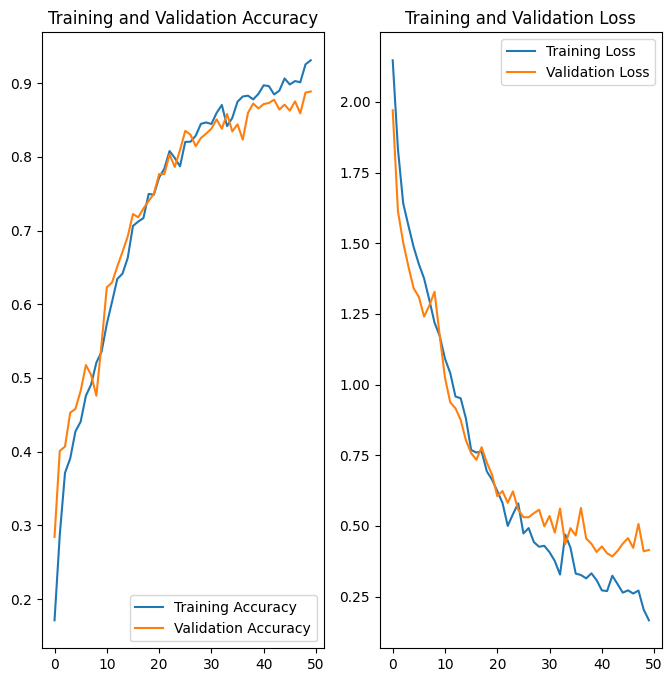

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Training and Validation Accuracy:

The model demonstrates consistency between training and validation accuracy, indicating effective generalization to new, unseen data.
Training and Validation Loss:

 The model exhibits comparable training and validation losses, suggesting robust learning without overfitting.
Validation Accuracy:
Achieving a validation accuracy of 87% signifies the model's capability to correctly classify a significant portion of the validation images, showcasing strong performance on previously unseen data.

1/1 [==============================] - 0s 196ms/step
Actual Class: basal cell carcinoma
Predictive Class: basal cell carcinoma


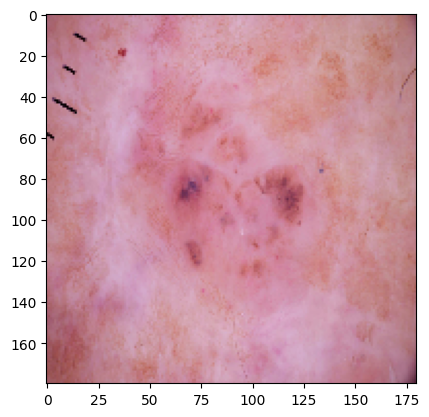

In [ ]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)